# Weight Searching



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from fitpass import fitpass_optimization

# Example

In [46]:
example1 = {
    # user info
    "name": "maritrini",
    # location
    "location": {
        "longitude": -99.2785640769574,
        "latitude": 19.331333823356587,
    },
    # user loss distance to studios
    "distance_sensitivity": 'medium', # low, medium, high
    # user preferences
    "preferences": {
        "love_activities": ["box", "wellness", "yoga"],
        "hate_activities": ["running", "mma"],
    },
    # constraints
    "is_pro": 1,
    "max_allowed_classes_per_class": 4,
    "num_classes_per_month": 15,
}

# example weights
WEIGHTS = {
    'distance': 0.6,
    'preference': 0.3,
    'activity': 0.1
}

# solve
df_ex1, fmin = fitpass_optimization(example1, WEIGHTS)

In [47]:
fmin

-0.9762619607546269

In [48]:
df_ex1

,gym_name,gym_times,activity,distance,preference_score,pro_status,geometry
0,El T3mplo Santa Fe Outdoors,4,"[box, functional, hiit, mma, wellness, yoga]",2.900263,1.0,1,POINT (2785181.701 820485.376)
1,Fever Club Pedregal,1,"[crossfit, cycling, functional, hiit, running,...",7.166054,1.0,1,POINT (2792164.677 816086.032)
2,Jazzercise Cuajimalpa,4,"[barre, dance, functional, pilates, yoga]",2.830060,1.0,1,POINT (2783440.366 819835.046)
3,La Fabrica Santa Fe,2,"[barre, box, cycling, functional, gym, hiit, y...",3.545510,1.0,1,POINT (2785899.077 821052.241)
4,Rumble Boxing Gym,4,"[box, functional]",2.847133,1.0,1,POINT (2785550.505 820405.053)


## Example 2

In [16]:
# example weights
WEIGHTS = {
    'distance': 0.9,
    'preference': 0.05,
    'activity': 0.05
}

# solve
df_ex1, fmin = fitpass_optimization(example1, WEIGHTS)

In [17]:
fmin

-0.9617320397563542

# Evaluate with dirichletm

In [49]:
# distribute weights using dirichlet
rng = np.random.default_rng(8)
weights = rng.dirichlet(np.ones(3), size=200)

# add wieghts (1,0,0), (0,1,0), (0,0,1)
weights = np.vstack([weights, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1])])
weights

array([[0.21507209, 0.57843315, 0.20649476],
       [0.74294523, 0.18704922, 0.07000555],
       [0.9174833 , 0.05965852, 0.02285817],
       [0.48246313, 0.21119888, 0.306338  ],
       [0.0311452 , 0.26027772, 0.70857708],
       [0.63874488, 0.13344499, 0.22781013],
       [0.1697908 , 0.63161541, 0.19859379],
       [0.04130793, 0.49790812, 0.46078394],
       [0.01151693, 0.70792374, 0.28055932],
       [0.05606385, 0.58816829, 0.35576786],
       [0.72545981, 0.11212046, 0.16241974],
       [0.31128745, 0.15695123, 0.53176132],
       [0.17983805, 0.54842942, 0.27173252],
       [0.03526237, 0.76478533, 0.19995231],
       [0.71820748, 0.083103  , 0.19868952],
       [0.48428751, 0.28606401, 0.22964847],
       [0.21377628, 0.0560167 , 0.73020702],
       [0.30855795, 0.31308982, 0.37835222],
       [0.43536774, 0.55137545, 0.01325681],
       [0.27472237, 0.64513278, 0.08014485],
       [0.79337938, 0.1032471 , 0.10337352],
       [0.60804812, 0.23804388, 0.153908  ],
       [0.

In [50]:
# function to map weight to dictionary
def map_weights_to_dict(weights):
    return {
        'distance': weights[0],
        'preference': weights[1],
        'activity': weights[2]
    }

fmins = []
for w in tqdm(weights):
    _, fmin = fitpass_optimization(example1, map_weights_to_dict(w))
    fmins.append(fmin)

100%|██████████| 203/203 [01:50<00:00,  1.84it/s]


In [37]:
fmins

[-0.9820187548020525,
 -0.9419424270798237,
 -0.9606591760337786,
 -0.9596633493336273,
 -0.9973960846895693,
 -0.9522691593322867,
 -0.9858045274619656,
 -0.996546422793376,
 -0.9990371190472248,
 -0.9953127447190695,
 -0.9523314904964394,
 -0.973974605399274,
 -0.9849645198695118,
 -0.9970518663999082,
 -0.9591150837612686,
 -0.959510820195284,
 -0.9832180760191153,
 -0.9742028068589205,
 -0.9639038486289063,
 -0.977031653222161,
 -0.9522480243318585,
 -0.9495289457077626,
 -0.9860250766241683,
 -0.981901995880056,
 -0.9879581245387913,
 -0.9925981874043975,
 -0.9638441164037064,
 -0.9641775256335592,
 -0.9959133831038895,
 -0.9952869348530449,
 -0.973952837535827,
 -0.961912187524386,
 -0.9763151608705427,
 -0.9796908726254168,
 -0.9988551782653263,
 -0.9491576056559343,
 -0.9672495175647908,
 -0.9719757826829233,
 -0.9614589056072489,
 -0.9841346230031718,
 -0.9712877729995879,
 -0.994325142157446,
 -0.9852786795367294,
 -0.9808954852624499,
 -0.9633010624059826,
 -0.98553423108458

In [44]:
max(fmins)

fmins.index(max(fmins))
#fmins.sort()
#fmins[1000]

737

In [45]:
weights[737]

array([0.78938434, 0.1898828 , 0.02073286])

In [22]:
df_010, _ = fitpass_optimization(example1, {'distance': 0, 'preference': 1, 'activity': 0})
df_010

,gym_name,gym_times,activity,distance,preference_score,pro_status,geometry
0,P&B Studio Interlomas,4,"[functional, pilates]",10.301302,1.0,1,POINT (2784782.045 824353.754)
1,Pilatestudio360 Lomas,4,"[functional, pilates]",4.649243,1.0,1,POINT (2791738.648 827364.247)
2,Soulcore Altavista,4,"[functional, pilates]",4.592210,1.0,1,POINT (2793852.506 819707.631)
3,Soulcore Bosques,4,"[functional, pilates]",8.258124,1.0,1,POINT (2786823.666 824016.142)
4,Soulcore Santa Fe cerrado,4,"[functional, pilates]",9.062813,1.0,1,POINT (2786452.757 821359.661)
5,Urban Camp - Pilates Reformer,3,"[functional, pilates]",4.548525,1.0,1,POINT (2796204.032 828540.176)


In [23]:
# transformation matrix
A = np.array([
    [0, 0.5, 1],
    [0, np.sqrt(3)/2, 0]
])

In [51]:
# transformed weights
X = weights @ A.T
X

array([[0.49571134, 0.5009378 ],
       [0.16353016, 0.16198937],
       [0.05268744, 0.0516658 ],
       [0.41193744, 0.18290359],
       [0.83871594, 0.22540712],
       [0.29453263, 0.11556675],
       [0.5144015 , 0.54699499],
       [0.70973801, 0.43120108],
       [0.63452119, 0.61307995],
       [0.64985201, 0.50936868],
       [0.21847997, 0.09709916],
       [0.61023693, 0.13592375],
       [0.54594724, 0.47495381],
       [0.58234497, 0.66232352],
       [0.24024102, 0.07196931],
       [0.37268048, 0.2477387 ],
       [0.75821537, 0.04851189],
       [0.53489713, 0.27114374],
       [0.28894453, 0.47750515],
       [0.40271124, 0.55870137],
       [0.15499707, 0.08941461],
       [0.27292994, 0.20615205],
       [0.60376109, 0.39678874],
       [0.57544107, 0.36042297],
       [0.48045153, 0.65041394],
       [0.51804135, 0.68143421],
       [0.23304966, 0.05162289],
       [0.35127944, 0.3814861 ],
       [0.62093117, 0.57190442],
       [0.52373879, 0.72726848],
       [0.

In [52]:
# dataframe of transformed weights and fmin
df = pd.DataFrame(columns=['x', 'y', 'fmin'])
df['x'] = X[:,0]
df['y'] = X[:,1]
df['fmin'] = fmins

df

,x,y,fmin
0,0.495711,0.500938,-0.988087
1,0.163530,0.161989,-0.977334
2,0.052687,0.051666,-0.988716
3,0.411937,0.182904,-0.973277
4,0.838716,0.225407,-0.998275
...,...,...,...
198,0.345846,0.188573,-0.969798
199,0.515796,0.073682,-0.979889
200,0.000000,0.000000,-0.999649
201,0.500000,0.866025,-1.000000


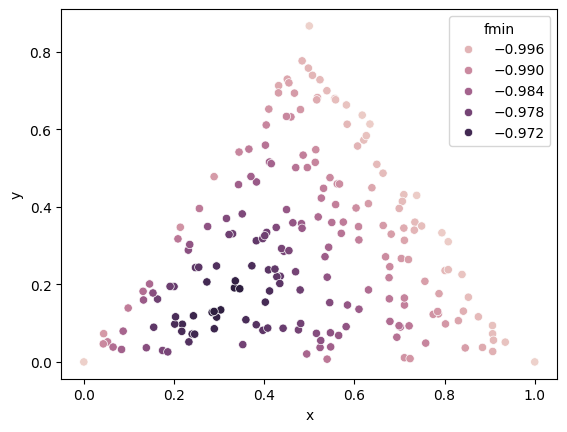

In [53]:
# scatter plot of df x and y colored by fmin
sns.scatterplot(data=df, x='x', y='y', hue='fmin')
plt.show()

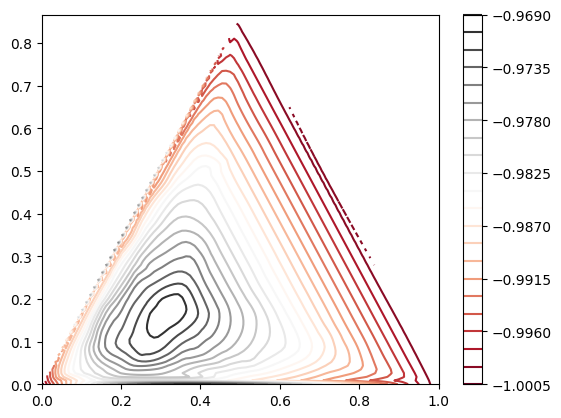

In [54]:
# plot level curves of fmin using df x and y
x = df['x'].values
y = df['y'].values
fmin = df['fmin'].values

# create grid
x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)

# create meshgrid
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# interpolate using griddata
from scipy.interpolate import griddata
Z_grid = griddata((x, y), fmin, (X_grid, Y_grid), method='cubic')

# plot contour
plt.contour(X_grid, Y_grid, Z_grid, 20, cmap='RdGy')
plt.colorbar()
plt.show()